# TP Integrador Análisis de datos

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.
Trabajaremos con un dataset de Kaggle con datos de por distintas estaciones metereológicas de
Australia.

El objetivo es predecir si lloverá o no al día siguiente (variable RainTomorrow), en función datos
metereológicos del día actual.

### 1. Análisis exploratorio inicial
Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)
- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

Primer se definen las librerías a utilizar

In [122]:
# Se importan las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import category_encoders as ce

Posteriormente se descarga [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv). Este dataset se encuentra en el mismo directorio que este archivo. El nombre del archivo es weatherAUS.csv.

Se carga el dataset y se visualizan las primeras filas.

In [182]:
# Se carga el dataset
weather = pd.read_csv("weatherAUS.csv")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Se realiza un resumen de cada una de las columnas del dataset. Se puede observar la cantidad de observaciones que no son NaNs o Nulls, la media, la desviación estandar, el minimo, el máximo, Q1, Q2 y Q3.

In [124]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Se observa el tipo de dato de cada una de las columnas del dataframe. Siete de las variables son categóricas, el resto de las variables son numéricas. Dentro de las variables categóricas se encuentran las fechas de obtención de los datos (Date) con formato year-month-day, la ciudad donde fue tomada la información (Location), la dirección de la ráfaga de viento más fuerte en el día (WinGustDir), la dirección del viento a las 9 am (WindDir9am) y 3 pm (WindDir93m), estos últimos tres están representados por direcciones cardinales y combinaciones de ellas, (W, N, SE etc). Además se tiene información de si llovío en el día (RainToday) y si llovío en el día siguiente (Rain Tomorrow). Estos últimos toman valores de (Yes, No, NaN).

Dentro de las variables numéricas se encuentra la máxima y mínima temperatura en el día (MaxTemp y MinTemp respectivamente). La cantidad de lluvia medida en el día en milímetros (RainFall), la evaporacion en el día en mm (Evaporation), el número de horas de sol en el día (Sunshine), La velocidad de la ráfaga de viento más fuerte durante el día (WindGustSpeed) en km/h, la velocidad del viento promedio durante los 10 minutos anteriores a las 9am (WindSpeed9am) y a las 3pm (WindSpeed3pm). Se tiene además la humedad en porcentaje a las 9am y las 3pm (Humidity9am y Humidity3pm), la presión en hPa a los mismos horarios (Pressure9am y Pressure3pm) y la Temperatura en C (Temp9am y Temp3pm). Por último se tiene información acerca de la nubosidad de al mismo horario, este se mide en fracciones de cielo oscurecido en oktas (Cloud9am y Cloud3pm).

In [125]:
#weather.info()
weather.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Se identifican las variables de entrada y de salida del problema. Dado que el objetivo es predecir si lloverá o no el día siguiente basado en las condiciones climáticas y otros factores, la variable de salida es si lloverá o no el día siguiente (RainTomorrow). El resto de las variables son las variables de entrada.


In [126]:
Y = weather["RainTomorrow"].to_frame().copy()
Y.head()


,RainTomorrow
0,No
1,No
2,No
3,No
4,No


In [127]:
X = weather.drop(["RainTomorrow"], axis=1).copy()
X.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


Posteriormente se realiza el análisis de de las de la distribuciones de cada una de las varibles del dataset. Se obtinen los valores únicos de cada una de las columnas del dataset.

In [129]:
print("Unique values X:")
print(X.nunique(dropna=False))


Unique values X:
Date             3436
Location           49
MinTemp           390
MaxTemp           506
Rainfall          682
Evaporation       359
Sunshine          146
WindGustDir        17
WindGustSpeed      68
WindDir9am         17
WindDir3pm         17
WindSpeed9am       44
WindSpeed3pm       45
Humidity9am       102
Humidity3pm       102
Pressure9am       547
Pressure3pm       550
Cloud9am           11
Cloud3pm           11
Temp9am           442
Temp3pm           503
RainToday           3
dtype: int64


In [130]:
print("\nUnique values Y:")
print(Y.nunique(dropna=False))


Unique values Y:
RainTomorrow    3
dtype: int64


Primero se analizan los datos categóricos.

In [132]:
# Se obtienen los datos categóricos del dataframe
X_categorical = X.select_dtypes(include=["object"]).copy()
print("Tipos de datos:")
print(X_categorical.dtypes)
print("\nValores únicos:")
print(X_categorical.nunique(dropna=False))

Tipos de datos:
Date           object
Location       object
WindGustDir    object
WindDir9am     object
WindDir3pm     object
RainToday      object
dtype: object

Valores únicos:
Date           3436
Location         49
WindGustDir      17
WindDir9am       17
WindDir3pm       17
RainToday         3
dtype: int64


In [186]:
def display_dataset_categorical(dataset):
    fig, ax = plt.subplots(1, len(dataset.columns), figsize=(20,10))
    for i, categorical_feature in enumerate(dataset):
        dataset[categorical_feature].value_counts().plot(kind="bar", ax=ax[i]).set_title(categorical_feature)

Se grafican la distribución de los datos categóricos.

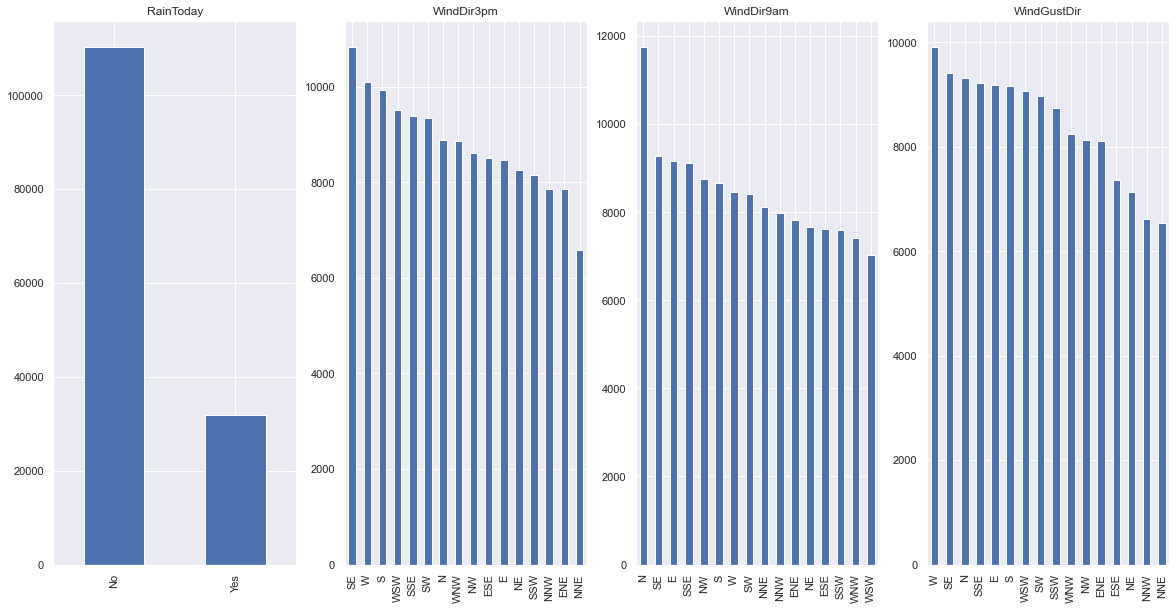

In [187]:
# Se grafican la distribución de los datos categóricos de algunas de las columnas
cols = ['RainToday', "WindDir3pm", "WindDir9am", "WindGustDir"]
display_dataset_categorical(X_categorical[cols])

<AxesSubplot:title={'center':'Location'}>

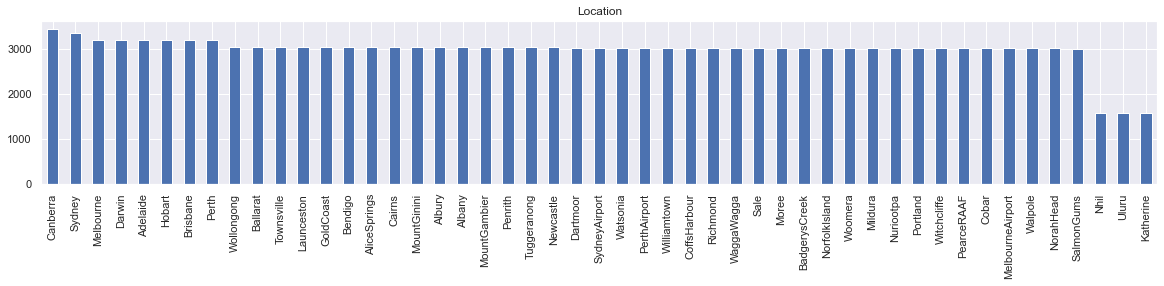

In [137]:
# Se grafican la distribución de ciudades
X_categorical["Location"].value_counts().plot(kind="bar", figsize=(20,3), title="Location")


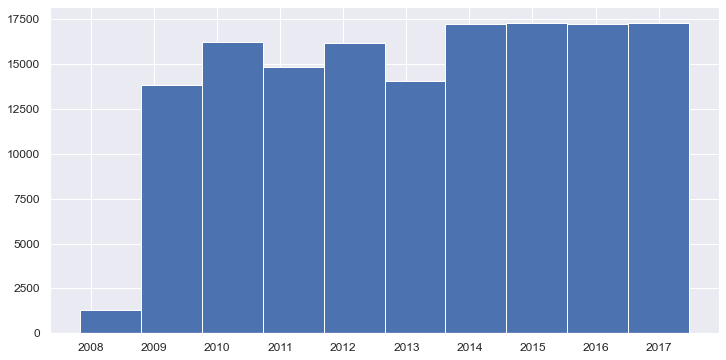

In [141]:
# Se grafica las fechas en función del año
fig = pd.to_datetime(X_categorical["Date"]).hist(xlabelsize=12, ylabelsize=12, figsize=(12, 6))

Con el objetivo de que la columna Date sea más representativa para el problema, puede agruparse esta columna por mes del año donde se toma la muestra.

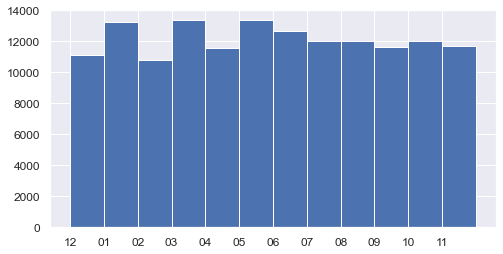

In [156]:
# Se grafica las muestras que fueron obtenidas en el transcurso de cada mes
fig = X_categorical["Date"].replace(to_replace="\d+\-(\d+)\-\d+", value=r"\1", regex=True).hist(xlabelsize=12, ylabelsize=12, figsize=(8, 4), bins=range(12 + 1))

Puede observarse que todas las categorías están bien representadas en el dataset. No existen etiquetas raras con pequeñas cantidades de muestras 

Una vez realizado el análisis de las variables categóricas, se hace un análisis similar con las variables numéricas.

In [157]:
# Se obtiene el dataframe de las variables numéricas
X_numerical = X.select_dtypes(include=["float64"])
X_numerical.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
dtype: object

In [158]:
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

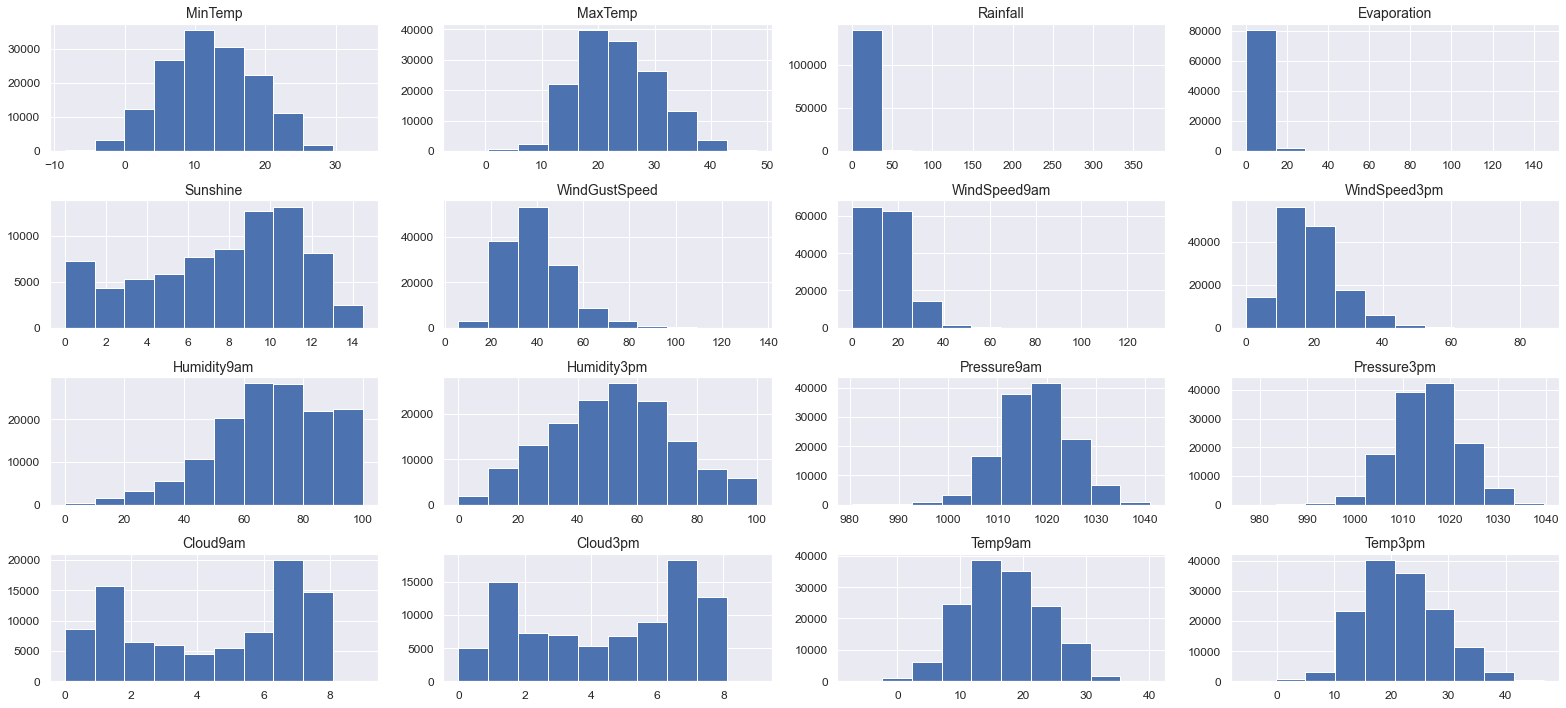

In [159]:
# Se obtienen las distribuciones de cada uno de los datos numericos
display_dataset_distributions(X_numerical)

En estas gráficas pueden observarse las distribuciones de cada una de las variables de entrada numéricas. Pueden observarse outliers bastante marcados en el caso de la cantidad de lluvia y la evaporación.

In [195]:
# TODO mostrar outliers

Por último, se grafican las variables de salida.

<AxesSubplot:xlabel='RainTomorrow'>

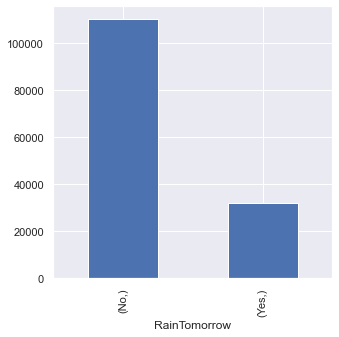

In [163]:
Y.value_counts().plot(kind="bar", figsize=(5, 5))

In [196]:
# TODO hacer plots de lluvia dependiendo de su categoría.

Puede observarse que las clases no están balanceadas. Estas clases podrían codificarse con valores 1 (Yes) y 0 (No).

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. Todos los puntos analizarlos para los dos problemas planteados.
- Para ello, se debe particionar el dataset en entrenamiento y validación.

Se debe particionar el dataset en entrenamiento y validación.

In [166]:
def split_dataset(df, proportions=[0.8, 0.1, 0.1]):
    train, validate, test = np.split(
        df.sample(frac=1, random_state=42), [int(proportions[0] * len(df)), int((proportions[0] + proportions[1]) * len(df))]
    )
    return train, validate, test

In [168]:
# Se separan los datos en train 80 %, validation 10 % y test 10 %
train_proportion = 0.8
val_proportion = 0.1
test_proportion = 0.1

# Se obtienen los datasets de entranamiento, validación y test
train, validate, test = split_dataset(weather)

Y_train = train["RainTomorrow"].to_frame().copy()
X_train = train.drop(["RainTomorrow"], axis=1).copy()

Y_val = validate["RainTomorrow"].to_frame().copy()
X_val = validate.drop(["RainTomorrow"], axis=1).copy()

print("Datasets shapes:")
print("train: ", train.shape)
print("validation: ", validate.shape)
print("test: ", test.shape)


Datasets shapes:
train:  (116368, 23)
validation:  (14546, 23)
test:  (14546, 23)


### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

Primero se determinan la cantidad de datos faltantes de cada una de las variables.

In [170]:
print("Número de datos faltantes por columna:")
print(weather.isna().sum())

Número de datos faltantes por columna:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [177]:
print("\nPorcentaje de NaNs por columna:")
weather.isna().sum() / weather.shape[0] * 100


Porcentaje de NaNs por columna:


Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Se eliminan todas las filas cuyo valor de label es NaNs

In [183]:
# Limpieza de registros que no tienen label
initial_shape = weather.shape
print("weather shape inicial:", weather.shape)
weather = weather[weather['RainTomorrow'].isna() == False]

# Separación en features y labels
print("weather shape:", weather.shape)
print("Se eliminaron {} filas".format(initial_shape[0] - weather.shape[0]))

weather shape inicial: (145460, 23)
weather shape: (142193, 23)
Se eliminaron 3267 filas


Posteriormente se hace una limpieza de columnas con porcentaje de NaNs de más de 15 %.

In [184]:
# Se eliminan las columnas con NaNs mayores a 15%
max_nans = 15
nan_percentage = weather.isna().sum() / weather.shape[0] * 100
drop_columns = nan_percentage[nan_percentage > max_nans].to_frame()
print("Columnas a eliminar:")
print(list(drop_columns.index))
weather = weather.drop(list(drop_columns.index), axis=1).copy()

print("Columnas que se mantienen:")
print(weather.columns)

Columnas a eliminar:
['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
Columnas que se mantienen:
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


Una vez eliminadas las columans con Nans, se calcula el porcentaje de NaNs nuevamente

In [189]:
print("\nPorcentaje de NaNs")
weather.isna().sum() / weather.shape[0] * 100


Porcentaje de NaNs


Date             0.000000
Location         0.000000
MinTemp          0.447983
MaxTemp          0.226453
Rainfall         0.988797
WindGustDir      6.561504
WindGustSpeed    6.519308
WindDir9am       7.041838
WindDir3pm       2.656952
WindSpeed9am     0.948007
WindSpeed3pm     1.849599
Humidity9am      1.247600
Humidity3pm      2.538803
Pressure9am      9.855619
Pressure3pm      9.832411
Temp9am          0.635756
Temp3pm          1.917113
RainToday        0.988797
RainTomorrow     0.000000
dtype: float64

Para poder realizar la imputación de datos faltantes se definen algunas funciones.

In [194]:
# Imputación por moda
def fill_category_mode(df):
    return df.fillna(df.mode().iloc[0])

# Imputación por valor MISSING  
def fill_category_missing(df):
    return df.fillna("MISSING")

# Imputación por media
def fill_category_mean(df):
    return df.fillna(df.mean(axis=0))

# Imputación por mediana
def fill_category_median(df):
    return df.fillna(df.median(axis=0))

# Imputación por constante
def fill_category_constant(df, const):
    return df.fillna(const)

# TODO implementar MICE
# TODO implementar KNN 

Primero se realiza la imputación de las variables categóricas

In [191]:
# Se obtinen las variables categóricas
weather_categorical = weather.select_dtypes(include=["object"])
# Se imputa con una columna MISSING
weather_cat_missing = fill_category_missing(weather_categorical)

weather_categorical = weather_cat_missing

Luego se imputan las variables numéricas

In [193]:
# Se obtinen las variables numéricas
weather_numerical = weather.select_dtypes(include=["float64"])
# Se realiza la imputación por media
weather_numerical_mean = fill_category_mean(weather_numerical)

weather_numerical = weather_numerical_mean

Se codifican las variables categoricas

In [73]:
def one_hot_encoding(df, column_name):
    one_hot = pd.get_dummies(df[column_name])
    df = df.drop(column_name, axis=1)
    # Change columns names
    for column in one_hot.columns:
        one_hot.rename(columns={column: column_name + "_" + column}, inplace=True)
    return df.join(one_hot)

In [87]:
def boolean_encoding(df, column_name, mapping={'Yes': int(1), 'No': int(0)}):
    df = df.replace({column_name: mapping})
    df[column] = df[column].astype(int)
    return df

In [79]:
def binary_encoding(df, column_name):
    encoder = ce.BinaryEncoder(cols=[column_name], return_df=True)
    return encoder.fit_transform(df) 


In [112]:

def month_hot_encoding(df, column_name):
    # Replace month using one hot encoding
    df[column_name] = df[column_name].replace(to_replace="\d+\-(\d+)\-\d+", value="Month_" + r"\1", regex=True)
    df = one_hot_encoding(df, column_name)
    return df
    


In [113]:
df = weather_categorical.copy()
for column in weather_categorical.columns:
    if column in ["WindDir3pm", "WindDir9am", "WindGustDir", "RainToday"]:
        df = one_hot_encoding(df, column)
    elif column in ["RainTomorrow"]:
        df = boolean_encoding(df, column)
    elif column in ["Location"]:
        df = binary_encoding(df, column)
    elif column in ["Date"]:
        df = month_hot_encoding(df, column)
df

C:\Users\laure\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Location_0,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,RainTomorrow,Date_Month_01,Date_Month_02,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_MISSING,RainToday_No,RainToday_Yes
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
145455,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
145456,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
145457,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.

In [ ]:
weather_treated = 